## "Personal music likes vs. country popularity" report.

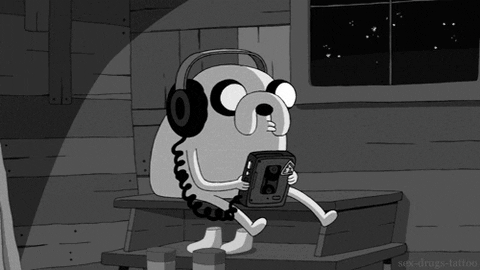

#### by Daniel Popescu 

#### 1. Overview

How does some of the music in one of my playlists compare to what's popular in the country based on danceability? 

The purpose of this report is to compare personal music that I like to what's popular in the country.

In [73]:
import requests
import base64
import six
import json
import matplotlib.pyplot as plt
import pandas as pd

#### First, we begin by inputing ouur spotify keys which are used to pull the data from the Spotify API.

In [74]:
tokens = pd.read_csv('Spotify_Keys.txt', sep = '\t', header = None).T
tokens.columns = tokens.iloc[0]
tokens = tokens[1:]
#tokens.Client_Secret[1]

#### Second, we insert the code for all the tools that we will be using through our project. These are entered in order to help pull said data along with the tokens for it.

In [75]:
def start_session_headers(client_id, client_secret):
    client_cred = base64.b64encode(six.text_type(client_id + ":" + client_secret).encode("ascii"))
    headers = {"Authorization": "Basic %s" % client_cred.decode("ascii")}
    return headers

#print(start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1]))

In [76]:
def connect_to_client_cred(url, headers):
    payload = {'grant_type' : 'client_credentials'}
    response = requests.request("POST", url, headers = headers, data = payload)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [77]:
def get_access_token():
    #Uses the Client Credentials flow, no access to endpoints with user data
    url = "https://accounts.spotify.com/api/token"
    header = start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1])
    json_response = connect_to_client_cred(url, header)

    #return json.dumps(json_response, indent = 4, sort_keys = True)
    return json_response

In [78]:
session_token = get_access_token()

200


In [79]:
#session_token

In [80]:
#session_token['access_token']

In [81]:
def create_header(session_token):
    headers = {"Authorization": "Bearer {}".format(session_token)}
    return headers

#create_header(session_token['access_token'])

In [82]:
def connect_to_endpoint(url, headers):
    response =requests.request("GET", url, headers = headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

#### The track_audio_features will be used to track each feature for the music in the albums and playlists. 

In [83]:
def track_audio_features(id):
    url = 'https://api.spotify.com/v1/audio-features/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

#### Get_an_album will be used to pull the data for an album from Spotify.

In [84]:
def get_an_album(id):
    url = 'https://api.spotify.com/v1/albums/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

#### Get_a_playlist will be used to pull the data for a playlist from Spotify.

In [85]:
def get_a_playlist(id):
    url = '	https://api.spotify.com/v1/playlists/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

### GLASS ANIMALS - How To be A Human Being

In [86]:
album = get_an_album('6qb9MDR0lfsN9a2pw77uJy')

200


In [87]:
#album

In [88]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [89]:
album['tracks']['items'][0]['id']

'32zkKx35Et6A515oZKxDkD'

In [90]:
glass_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200


In [91]:
#audio_features

In [92]:
glass_features_df = pd.DataFrame(glass_features)
glass_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.699,0.670,1,-6.219,1,0.0347,0.0147,0.220000,0.356,0.556,111.988,audio_features,32zkKx35Et6A515oZKxDkD,spotify:track:32zkKx35Et6A515oZKxDkD,https://api.spotify.com/v1/tracks/32zkKx35Et6A...,https://api.spotify.com/v1/audio-analysis/32zk...,281407,4
1,0.648,0.718,9,-7.765,0,0.0298,0.1290,0.001560,0.112,0.785,96.017,audio_features,1LPGwuFgIzbJoShfDdw7MY,spotify:track:1LPGwuFgIzbJoShfDdw7MY,https://api.spotify.com/v1/tracks/1LPGwuFgIzbJ...,https://api.spotify.com/v1/audio-analysis/1LPG...,230693,4
2,0.742,0.289,5,-7.833,0,0.1150,0.5430,0.000046,0.228,0.710,147.986,audio_features,4vcoNCrTtunmJ9q8srpVly,spotify:track:4vcoNCrTtunmJ9q8srpVly,https://api.spotify.com/v1/tracks/4vcoNCrTtunm...,https://api.spotify.com/v1/audio-analysis/4vco...,243509,4
3,0.698,0.664,7,-7.828,1,0.0778,0.1210,0.001310,0.331,0.623,96.001,audio_features,5C5gvDZsl6d8bh89URfKHr,spotify:track:5C5gvDZsl6d8bh89URfKHr,https://api.spotify.com/v1/tracks/5C5gvDZsl6d8...,https://api.spotify.com/v1/audio-analysis/5C5g...,253831,4
4,0.460,0.314,6,-10.158,0,0.0267,0.6990,0.000004,0.122,0.216,90.014,audio_features,5o4znEHwozOHIgHoWAllnr,spotify:track:5o4znEHwozOHIgHoWAllnr,https://api.spotify.com/v1/tracks/5o4znEHwozOH...,https://api.spotify.com/v1/audio-analysis/5o4z...,266747,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

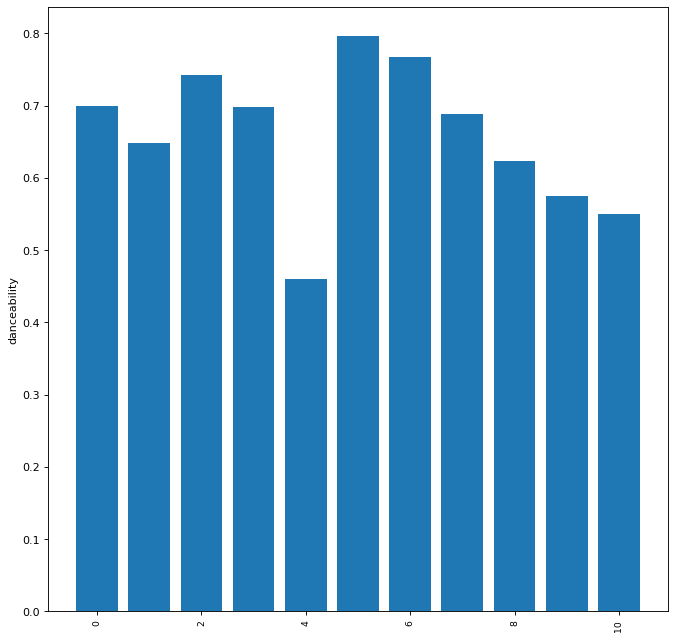

In [93]:
labels = glass_features_df['danceability'].keys()
vals = glass_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### JOJI - BALLADS1

In [94]:
album = get_an_album('34GQP3dILpyCN018y2k61L')

200


In [95]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [96]:
album['tracks']['items'][0]['id']

'5aqu5xhPqoOWqF71PkfgM8'

In [97]:
joji_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200


In [98]:
joji_features_df = pd.DataFrame(joji_features)
joji_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.787,0.312,7,-12.401,1,0.0383,0.895,0.02240,0.1150,0.425,119.899,audio_features,5aqu5xhPqoOWqF71PkfgM8,spotify:track:5aqu5xhPqoOWqF71PkfgM8,https://api.spotify.com/v1/tracks/5aqu5xhPqoOW...,https://api.spotify.com/v1/audio-analysis/5aqu...,128888,4
1,0.515,0.479,3,-7.458,1,0.0261,0.544,0.00598,0.1910,0.284,88.964,audio_features,0rKtyWc8bvkriBthvHKY8d,spotify:track:0rKtyWc8bvkriBthvHKY8d,https://api.spotify.com/v1/tracks/0rKtyWc8bvkr...,https://api.spotify.com/v1/audio-analysis/0rKt...,209274,4
2,0.646,0.648,3,-8.602,1,0.0372,0.710,0.00316,0.1080,0.466,75.004,audio_features,1DMEzmAoQIikcL52psptQL,spotify:track:1DMEzmAoQIikcL52psptQL,https://api.spotify.com/v1/tracks/1DMEzmAoQIik...,https://api.spotify.com/v1/audio-analysis/1DME...,179423,4
3,0.305,0.715,7,-7.540,1,0.0554,0.105,0.04950,0.0906,0.290,82.977,audio_features,0Y9D1Bc4fAkeZnVsGKdij6,spotify:track:0Y9D1Bc4fAkeZnVsGKdij6,https://api.spotify.com/v1/tracks/0Y9D1Bc4fAke...,https://api.spotify.com/v1/audio-analysis/0Y9D...,251015,4
4,0.900,0.316,9,-8.797,1,0.3320,0.684,0.07710,0.0853,0.844,129.914,audio_features,39oeKRgsLeynDIbWuXyA47,spotify:track:39oeKRgsLeynDIbWuXyA47,https://api.spotify.com/v1/tracks/39oeKRgsLeyn...,https://api.spotify.com/v1/audio-analysis/39oe...,107077,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

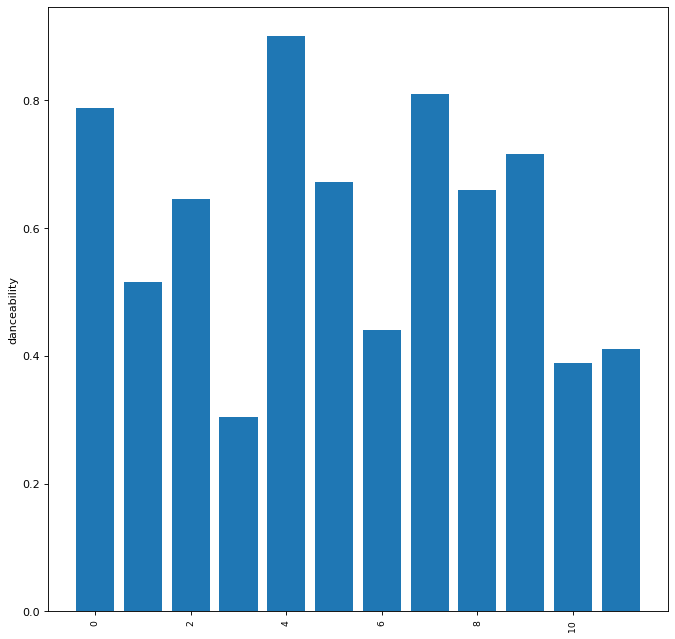

In [99]:
labels = joji_features_df['danceability'].keys()
vals = joji_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### BILLIE EILISH - WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?

In [100]:
album = get_an_album('0S0KGZnfBGSIssfF54WSJh')

200


In [101]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [102]:
album['tracks']['items'][0]['id']

'0rQtoQXQfwpDW0c7Fw1NeM'

In [103]:
billie_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [104]:
billie_features_df = pd.DataFrame(billie_features)
billie_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.000,0.278,1,-21.630,1,0.000,0.768,0.00000,0.669,0.0000,0.000,audio_features,0rQtoQXQfwpDW0c7Fw1NeM,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,https://api.spotify.com/v1/tracks/0rQtoQXQfwpD...,https://api.spotify.com/v1/audio-analysis/0rQt...,13578,0
1,0.701,0.425,7,-10.965,1,0.375,0.328,0.13000,0.100,0.5620,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
2,0.521,0.125,9,-17.832,1,0.239,0.751,0.00207,0.265,0.0528,111.554,audio_features,4QIo4oxwzzafcBWkKjDpXY,spotify:track:4QIo4oxwzzafcBWkKjDpXY,https://api.spotify.com/v1/tracks/4QIo4oxwzzaf...,https://api.spotify.com/v1/audio-analysis/4QIo...,243725,4
3,0.678,0.533,4,-10.485,1,0.186,0.462,0.21900,0.139,0.3230,150.455,audio_features,3XF5xLJHOQQRbWya6hBp7d,spotify:track:3XF5xLJHOQQRbWya6hBp7d,https://api.spotify.com/v1/tracks/3XF5xLJHOQQR...,https://api.spotify.com/v1/audio-analysis/3XF5...,180953,4
4,0.726,0.444,8,-8.922,0,0.372,0.283,0.14300,0.177,0.5690,185.044,audio_features,6IRdLKIyS4p7XNiP8r6rsx,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,https://api.spotify.com/v1/tracks/6IRdLKIyS4p7...,https://api.spotify.com/v1/audio-analysis/6IRd...,168840,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

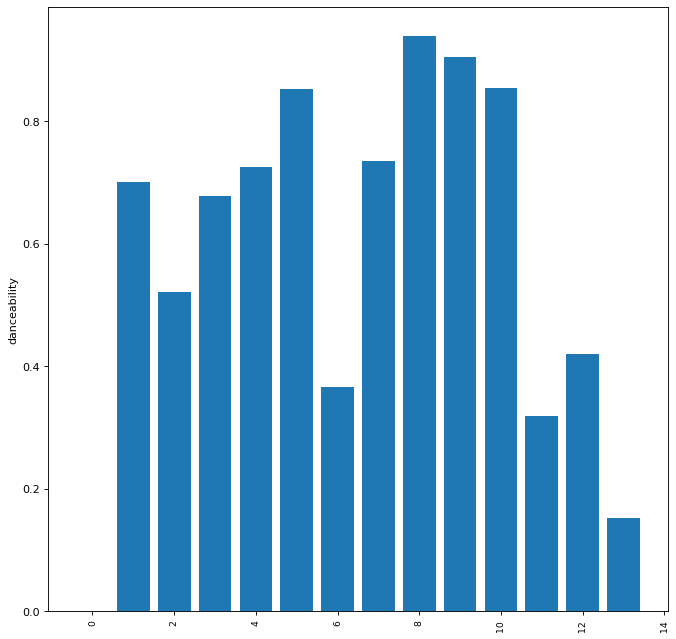

In [105]:
labels = billie_features_df['danceability'].keys()
vals = billie_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### KID CUDI - Man On The Moon: The End Of Day

In [106]:
album = get_an_album('47y3PbX8oIDCkYAFylCJz0')

200


In [107]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [108]:
album['tracks']['items'][0]['id']

'3Xm9jQDd8my7ui5DUtEHYf'

In [109]:
kid_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [110]:
kid_features_df = pd.DataFrame(kid_features)
kid_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.650,0.417,2,-12.413,0,0.0574,0.286,0.000033,0.1040,0.475,98.415,audio_features,3Xm9jQDd8my7ui5DUtEHYf,spotify:track:3Xm9jQDd8my7ui5DUtEHYf,https://api.spotify.com/v1/tracks/3Xm9jQDd8my7...,https://api.spotify.com/v1/audio-analysis/3Xm9...,199000,4
1,0.464,0.754,9,-6.653,0,0.1280,0.465,0.000016,0.3700,0.444,86.501,audio_features,1cdC9TCqyLwAlsw3fVJaJS,spotify:track:1cdC9TCqyLwAlsw3fVJaJS,https://api.spotify.com/v1/tracks/1cdC9TCqyLwA...,https://api.spotify.com/v1/audio-analysis/1cdC...,235627,4
2,0.802,0.742,1,-4.607,1,0.1110,0.265,0.000287,0.6300,0.512,95.000,audio_features,77fcAXl6MsFPtFJG45zTUE,spotify:track:77fcAXl6MsFPtFJG45zTUE,https://api.spotify.com/v1/tracks/77fcAXl6MsFP...,https://api.spotify.com/v1/audio-analysis/77fc...,151333,4
3,0.768,0.449,7,-7.569,0,0.0290,0.518,0.000463,0.1360,0.614,79.120,audio_features,2EHEQx2avP1fNBLJf5UGYy,spotify:track:2EHEQx2avP1fNBLJf5UGYy,https://api.spotify.com/v1/tracks/2EHEQx2avP1f...,https://api.spotify.com/v1/audio-analysis/2EHE...,266307,4
4,0.723,0.452,11,-9.420,0,0.0328,0.308,0.006400,0.0923,0.375,125.015,audio_features,246SdvVYT3yrZPXU7NSWwy,spotify:track:246SdvVYT3yrZPXU7NSWwy,https://api.spotify.com/v1/tracks/246SdvVYT3yr...,https://api.spotify.com/v1/audio-analysis/246S...,261360,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

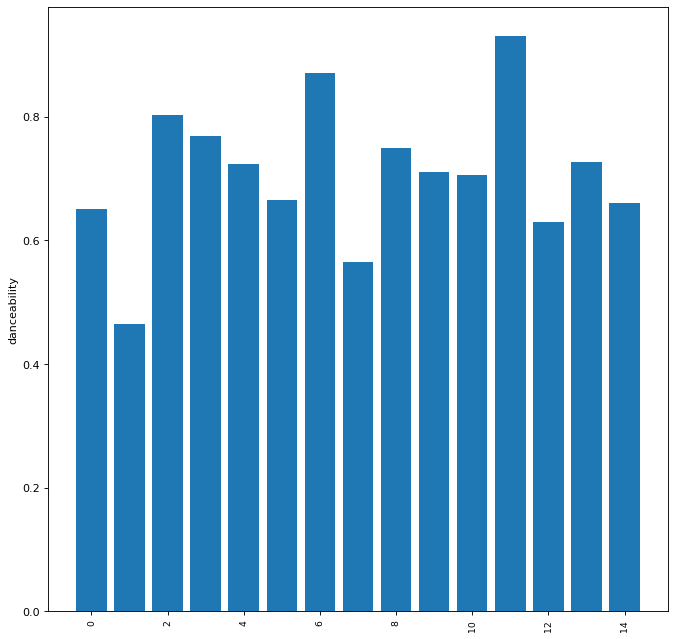

In [111]:
labels = kid_features_df['danceability'].keys()
vals = kid_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### KID CUDI - Passion, Pain & Demon Slayin'

In [112]:
album = get_an_album('5bCk3kWAy2JbbTfHqzZCII')

200


In [113]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [114]:
album['tracks']['items'][0]['id']

'0O6jl8Zamz6TGF0nUwMQsF'

In [115]:
cudi_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [116]:
cudi_features_df = pd.DataFrame(cudi_features)
cudi_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.791,0.577,1,-6.555,1,0.0367,0.4980,0.470000,0.120,0.217,115.070,audio_features,0O6jl8Zamz6TGF0nUwMQsF,spotify:track:0O6jl8Zamz6TGF0nUwMQsF,https://api.spotify.com/v1/tracks/0O6jl8Zamz6T...,https://api.spotify.com/v1/audio-analysis/0O6j...,298240,4
1,0.357,0.377,2,-10.723,1,0.0428,0.6100,0.371000,0.110,0.116,165.208,audio_features,5cjsgbZ8tZYD4f0LNpApnf,spotify:track:5cjsgbZ8tZYD4f0LNpApnf,https://api.spotify.com/v1/tracks/5cjsgbZ8tZYD...,https://api.spotify.com/v1/audio-analysis/5cjs...,269227,3
2,0.595,0.442,7,-11.115,0,0.0289,0.1160,0.770000,0.114,0.134,81.992,audio_features,5Tm9At0xeFb0MtlV8uI3eY,spotify:track:5Tm9At0xeFb0MtlV8uI3eY,https://api.spotify.com/v1/tracks/5Tm9At0xeFb0...,https://api.spotify.com/v1/audio-analysis/5Tm9...,327973,4
3,0.756,0.850,9,-5.885,0,0.0538,0.0559,0.000809,0.111,0.415,100.005,audio_features,5FxVTEpoBress37MmlMhbZ,spotify:track:5FxVTEpoBress37MmlMhbZ,https://api.spotify.com/v1/tracks/5FxVTEpoBres...,https://api.spotify.com/v1/audio-analysis/5FxV...,257053,4
4,0.661,0.596,9,-8.176,0,0.0801,0.0391,0.331000,0.943,0.538,154.017,audio_features,4HMhDkyOObFngSAz2xeQhK,spotify:track:4HMhDkyOObFngSAz2xeQhK,https://api.spotify.com/v1/tracks/4HMhDkyOObFn...,https://api.spotify.com/v1/audio-analysis/4HMh...,250587,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

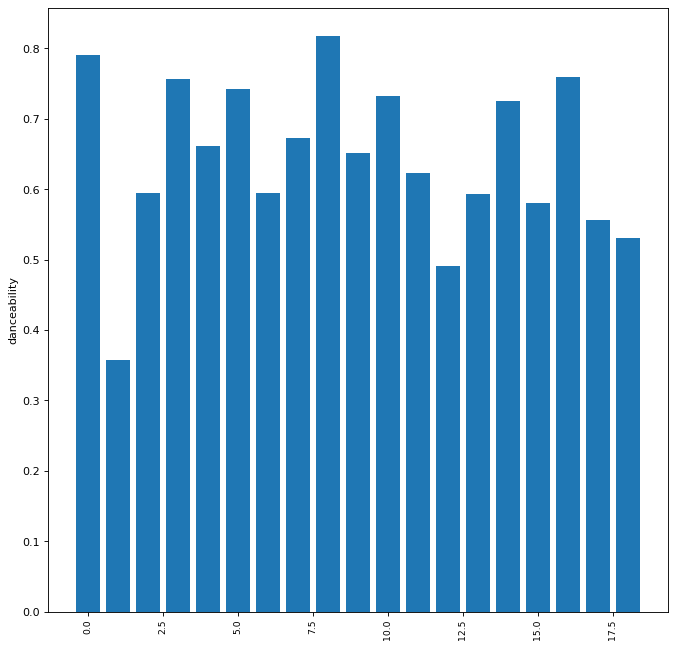

In [117]:
labels = cudi_features_df['danceability'].keys()
vals = cudi_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### TAME IMPALA - Currents

In [118]:
album = get_an_album('79dL7FLiJFOO0EoehUHQBv')

200


In [119]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [120]:
album['tracks']['items'][0]['id']

'2X485T9Z5Ly0xyaghN73ed'

In [121]:
impala_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [122]:
impala_features_df = pd.DataFrame(impala_features)
impala_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.602,0.881,1,-5.875,0,0.0443,0.004620,0.026600,0.1110,0.577,125.012,audio_features,2X485T9Z5Ly0xyaghN73ed,spotify:track:2X485T9Z5Ly0xyaghN73ed,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,https://api.spotify.com/v1/audio-analysis/2X48...,467587,4
1,0.536,0.526,0,-9.754,1,0.1810,0.159000,0.847000,0.1280,0.434,167.608,audio_features,1cCbsojaA6GIT7Y3zuMJ1q,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,https://api.spotify.com/v1/audio-analysis/1cCb...,107533,4
2,0.547,0.827,7,-6.036,1,0.0468,0.000296,0.101000,0.0858,0.451,119.089,audio_features,1UYj8qTWjneZJDVjUMwMub,spotify:track:1UYj8qTWjneZJDVjUMwMub,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,https://api.spotify.com/v1/audio-analysis/1UYj...,255413,4
3,0.373,0.609,0,-7.000,1,0.0316,0.108000,0.000427,0.0755,0.354,179.955,audio_features,0xtIp0lgccN85GfGOekS5L,spotify:track:0xtIp0lgccN85GfGOekS5L,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,https://api.spotify.com/v1/audio-analysis/0xtI...,270680,4
4,0.424,0.615,9,-6.217,0,0.0325,0.015800,0.000389,0.0844,0.155,77.935,audio_features,5M4yti0QxgqJieUYaEXcpw,spotify:track:5M4yti0QxgqJieUYaEXcpw,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,https://api.spotify.com/v1/audio-analysis/5M4y...,318591,4


### Below is a graph visualizing the danceability for this album. Each line below represents the danceability of each song on a scare from 0 to 1.0

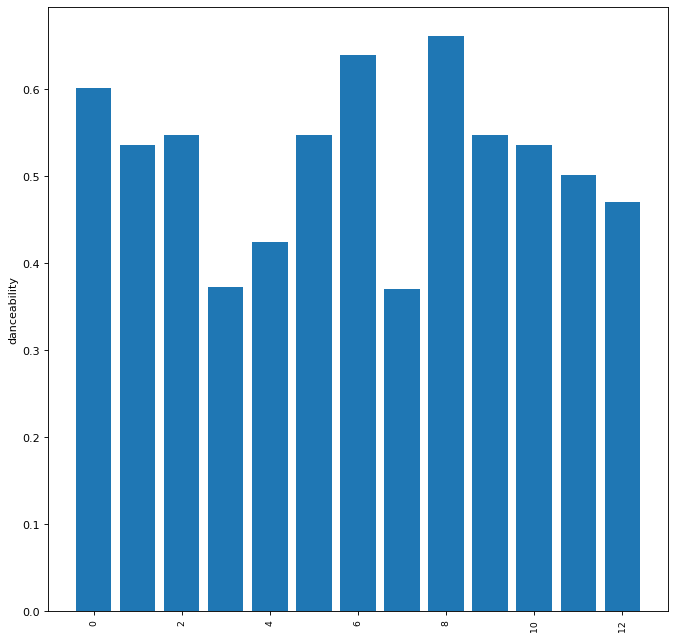

In [123]:
labels = impala_features_df['danceability'].keys()
vals = impala_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### MAC MILLER - Swimming

In [124]:
album = get_an_album('5wtE5aLX5r7jOosmPhJhhk')

200


In [125]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [126]:
album['tracks']['items'][0]['id']

'01z2fBGB8Hl3Jd3zXe4IXR'

In [127]:
miller_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [128]:
miller_features_df = pd.DataFrame(miller_features)
miller_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.272,0.238,2,-12.148,0,0.0349,0.890,0.00925,0.275,0.119,83.507,audio_features,01z2fBGB8Hl3Jd3zXe4IXR,spotify:track:01z2fBGB8Hl3Jd3zXe4IXR,https://api.spotify.com/v1/tracks/01z2fBGB8Hl3...,https://api.spotify.com/v1/audio-analysis/01z2...,161840,4
1,0.690,0.462,8,-8.054,1,0.1300,0.343,0.00218,0.113,0.325,157.655,audio_features,5p7GiBZNL1afJJDUrOA6C8,spotify:track:5p7GiBZNL1afJJDUrOA6C8,https://api.spotify.com/v1/tracks/5p7GiBZNL1af...,https://api.spotify.com/v1/audio-analysis/5p7G...,245640,4
2,0.759,0.492,1,-10.338,0,0.1200,0.736,0.00989,0.107,0.561,104.974,audio_features,2dgrYdgguVZKeCsrVb9XEs,spotify:track:2dgrYdgguVZKeCsrVb9XEs,https://api.spotify.com/v1/tracks/2dgrYdgguVZK...,https://api.spotify.com/v1/audio-analysis/2dgr...,288640,4
3,0.599,0.317,1,-11.212,1,0.1740,0.748,0.00000,0.111,0.203,148.090,audio_features,0Xcy81PsJCOO6mhLZaQyQ4,spotify:track:0Xcy81PsJCOO6mhLZaQyQ4,https://api.spotify.com/v1/tracks/0Xcy81PsJCOO...,https://api.spotify.com/v1/audio-analysis/0Xcy...,215413,4
4,0.520,0.538,1,-8.109,1,0.2060,0.367,0.00187,0.119,0.177,141.894,audio_features,5bJ1DrEM4hNCafcDd1oxHx,spotify:track:5bJ1DrEM4hNCafcDd1oxHx,https://api.spotify.com/v1/tracks/5bJ1DrEM4hNC...,https://api.spotify.com/v1/audio-analysis/5bJ1...,345133,4


### Below is a graph visualizing the danceability for this album.

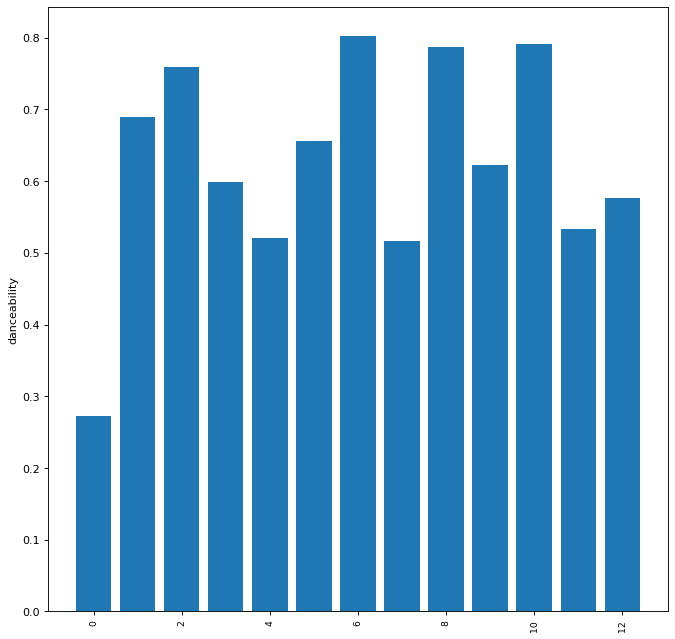

In [129]:
labels = miller_features_df['danceability'].keys()
vals = miller_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### PLAYLIST - TOP 50 USA

In [130]:
playlist = get_a_playlist('37i9dQZEVXbLRQDuF5jeBp')

200


In [131]:
playlist.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [134]:
playlist['tracks']['items'][0]['id']

KeyError: 'id'

In [133]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

NameError: name 'audio_features' is not defined

### This following graph is meant to show the danceability for the Top 50 album.

In [ ]:
labels = audio_features_df['danceability'].keys()
vals = audio_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### Next I am trying to compare both plots and see how the data matches danceability wise if at all.

### Conclusion.